In [36]:
#Importing Modules
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def Calculate_Histogram(img):
    m, n = img.shape
    
    #create a vector h with 256 colors all set to zero
    h = [0] * 256 
    
    #for each pixel (x,y) set h(img(x,y))=h(img(x,y))+1
    for x in range(m):
        for y in range(n):
            h[img[x, y]] = h[img[x, y]] + 1
            
    return np.array(h)
    

In [38]:
def Calculate_Cumulative_Histogram(h):
    Hc=np.zeros((1,256))
    for i in range(len(h)):
        Hc[0][i]=(sum(h[:i+1]))
    return Hc

In [39]:
def Calculate_Equalized_Histogram(Hc):
    NxM=Hc[0][Hc.size-1]
    new_pixel_intensities=np.zeros((1,256))
    for i in range(Hc.size):
        new_pixel_intensities[0][i]=(255/((NxM)-Hc[0][0]))*(Hc[0][i]-Hc[0][0])
    return new_pixel_intensities

In [40]:
def Calculate_Equalized_Image(img,Tp):
    eq_img=np.zeros_like(img)
    w,h=img.shape
    for x in range (w):
        for y in range (h):
            eq_img[x,y]=Tp[0][img[x,y]]
    return eq_img
            

In [41]:
def Segment_Optimal_Thresholding(img):
    m,n=img.shape
    img_copy=np.copy(img)
    
    mean_1=(img[0][0]+img[0][n-1]+img[m-1][0]+img[m-1][n-1])/4
    
    arr1d = np.delete(img_copy, n*(m-1)+(n-1))
    arr1d.shape=((1,m*n-1))
    new_img_after_removing_corner = np.delete(arr1d,[n-1,n*(m-1),0])
    
    mean_2= new_img_after_removing_corner.mean()
    
    threshold = (mean_1+mean_2)/2
    old_threshold = 0
    
    while threshold != old_threshold:
        mean_1 = img[(img >= 0) & (img < threshold)].mean()
        mean_2 = img[(img >= threshold) & (img < 255)].mean()
        old_threshold = threshold 
        threshold = (mean_1+mean_2)/2
        
    result = np.zeros_like(img)
    result[img >= threshold] = 255
    result[img < threshold] = 0
    return result
    

In [65]:
def Plot_Images(cols, images, titles):
    plt.subplots(figsize = (20,10))
    for i in range((len(images))):
        plt.subplot(2, cols, (i + 1))
        plt.title(titles[i], fontsize = 12, weight = 'bold')
        plt.imshow(images[i], cmap = 'gray')

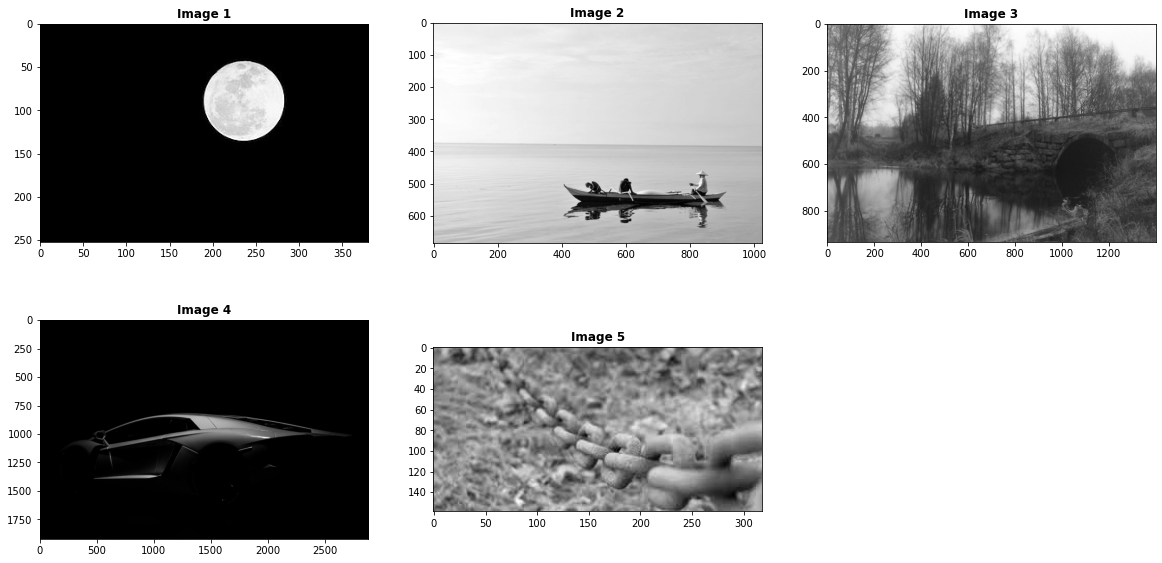

In [66]:
# load the images
imageData1 = Image.open('1.jpg')
imageData2 = Image.open('2.jpg')
imageData3 = Image.open('3.png')
imageData4 = Image.open('4.jpg')
imageData5 = Image.open('5.jpg')

#Convert the images to Grey_Scale
imageGrey1 = imageData1.convert('L')
imageGrey2 = imageData2.convert('L')
imageGrey3 = imageData3.convert('L')
imageGrey4 = imageData4.convert('L')
imageGrey5 = imageData5.convert('L')

#Convert images to numpy array
image1=np.asarray(imageGrey1,dtype='int64')
image2=np.asarray(imageGrey2,dtype='int64')
image3=np.asarray(imageGrey3,dtype='int64')
image4=np.asarray(imageGrey4,dtype='int64')
image5=np.asarray(imageGrey5,dtype='int64')

Plot_Images(3,images = [image1, image2, image3, image4, image5],
            titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'])


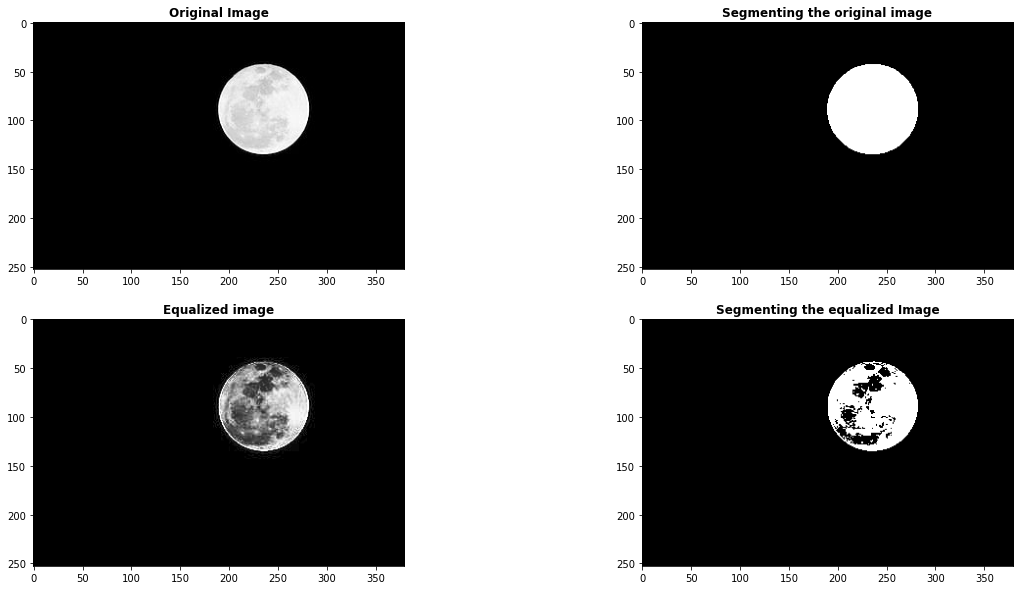

In [67]:
segment_original_img=Segment_Optimal_Thresholding(image1)
equalized_img=Calculate_Equalized_Image(image1,Calculate_Equalized_Histogram(Calculate_Cumulative_Histogram(Calculate_Histogram(image1))))
segment_equalized_img=Segment_Optimal_Thresholding(equalized_img)

Plot_Images(2,images = [image1, segment_original_img, equalized_img, segment_equalized_img],
            titles = ['Original Image', 'Segmenting the original image', 'Equalized image', 'Segmenting the equalized Image'])


Applying hisgoram equalization before segmenting the image DOES enahnce the the segmented output.

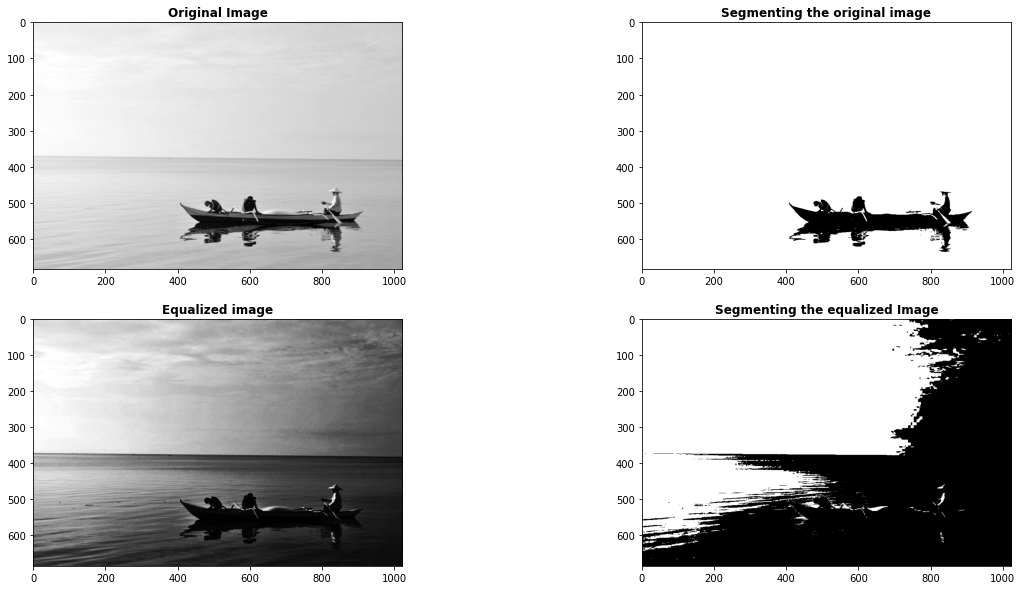

In [68]:
segment_original_img=Segment_Optimal_Thresholding(image2)
equalized_img=Calculate_Equalized_Image(image2,Calculate_Equalized_Histogram(Calculate_Cumulative_Histogram(Calculate_Histogram(image2))))
segment_equalized_img=Segment_Optimal_Thresholding(equalized_img)

Plot_Images(2,images = [image2, segment_original_img, equalized_img, segment_equalized_img],
            titles = ['Original Image', 'Segmenting the original image', 'Equalized image', 'Segmenting the equalized Image'])


Applying hisgoram equalization before segmenting the image DOES NOT enahnce the the segmented output.

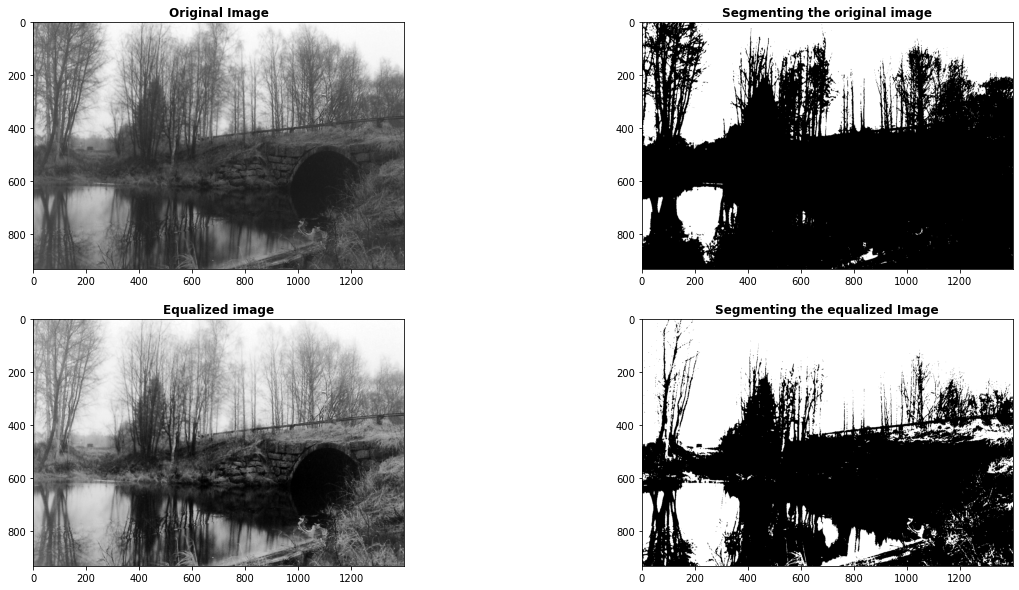

In [69]:
segment_original_img=Segment_Optimal_Thresholding(image3)
equalized_img=Calculate_Equalized_Image(image3,Calculate_Equalized_Histogram(Calculate_Cumulative_Histogram(Calculate_Histogram(image3))))
segment_equalized_img=Segment_Optimal_Thresholding(equalized_img)

Plot_Images(2,images = [image3, segment_original_img, equalized_img, segment_equalized_img],
            titles = ['Original Image', 'Segmenting the original image', 'Equalized image', 'Segmenting the equalized Image'])


Applying hisgoram equalization before segmenting the image DOES enahnce the the segmented output.

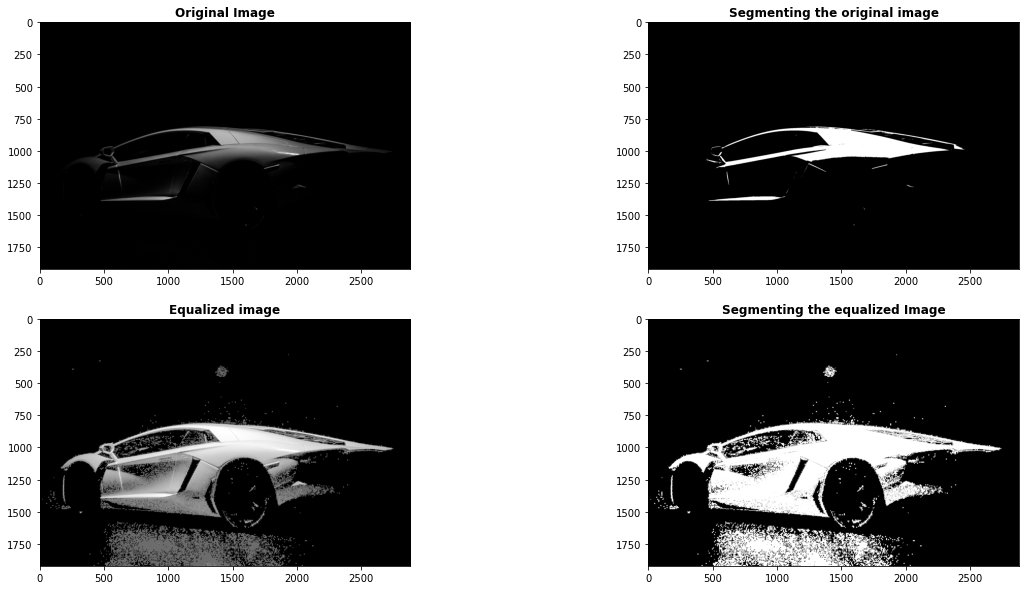

In [70]:
segment_original_img=Segment_Optimal_Thresholding(image4)
equalized_img=Calculate_Equalized_Image(image4,Calculate_Equalized_Histogram(Calculate_Cumulative_Histogram(Calculate_Histogram(image4))))
segment_equalized_img=Segment_Optimal_Thresholding(equalized_img)

Plot_Images(2,images = [image4, segment_original_img, equalized_img, segment_equalized_img],
            titles = ['Original Image', 'Segmenting the original image', 'Equalized image', 'Segmenting the equalized Image'])


Applying hisgoram equalization before segmenting the image DOES enahnce the the segmented output.

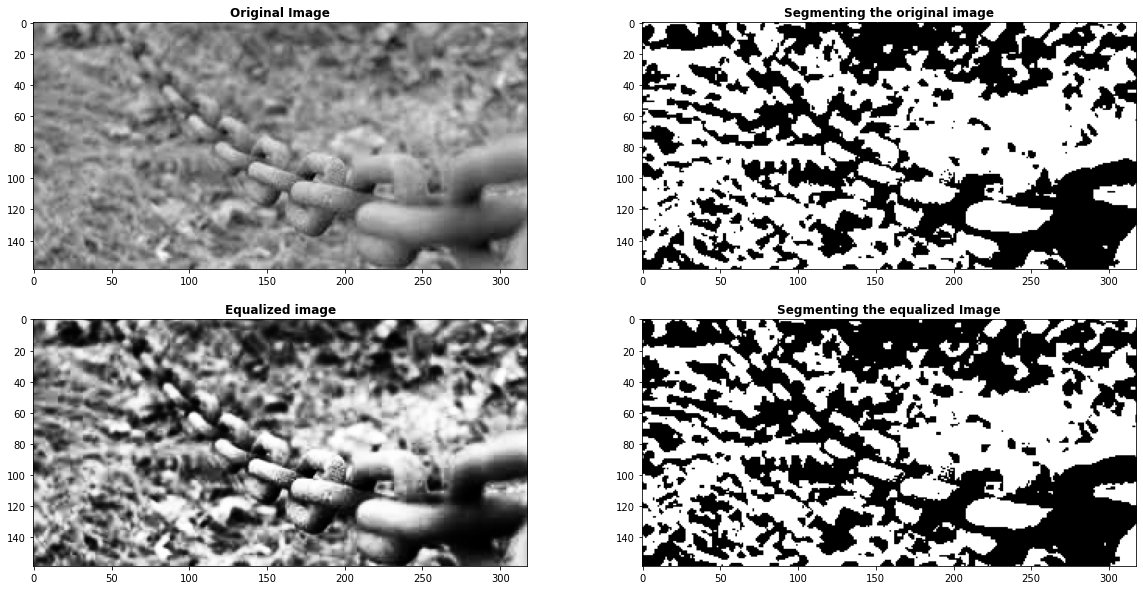

In [71]:
segment_original_img=Segment_Optimal_Thresholding(image5)
equalized_img=Calculate_Equalized_Image(image5,Calculate_Equalized_Histogram(Calculate_Cumulative_Histogram(Calculate_Histogram(image5))))
segment_equalized_img=Segment_Optimal_Thresholding(equalized_img)

Plot_Images(2,images = [image5, segment_original_img, equalized_img, segment_equalized_img],
            titles = ['Original Image', 'Segmenting the original image', 'Equalized image', 'Segmenting the equalized Image'])


Applying hisgoram equalization before segmenting the image DOES NOT enahnce the the segmented output.